<a href="https://colab.research.google.com/github/cjimenez275/Simulacion_Fisica/blob/main/7_ODEINT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuaciones diferenciales utilizando ODEINT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Ecuación diferencial de primer grado

Solucionemos por ejemplo la ecuación diferencial
$$\frac{dy}{dx}=4y\hspace{1cm}y(0)=2$$

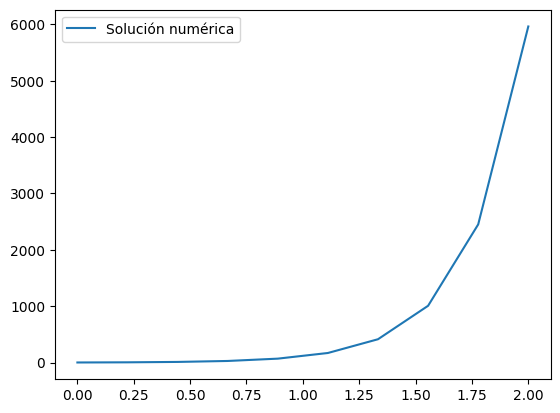

In [2]:
x0 = 0
y0 = 2
def ecuacion(y, x):
  f = 4*y
  return f
x = np.linspace(0, 2, 10)
ysol = odeint(ecuacion, y0, x)

plt.plot(x, ysol, label="Solución numérica")
plt.legend()
plt.show()

## Ecuación diferencial de segundo grado

Solucionemos la ED:
$$x''+ fx'+gx+h=0$$
Con
$$x(0)= a\hspace{1cm}x'(0)=b$$

Despejamos:
$$x''=-fx'-gx-h$$
y definimos los vectores:
$$R = [x, x']$$
$$F = [x', -fx'-gx-h]$$
Llamamos $x'=v$

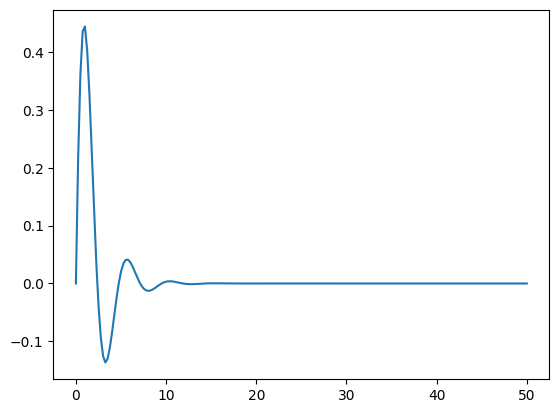

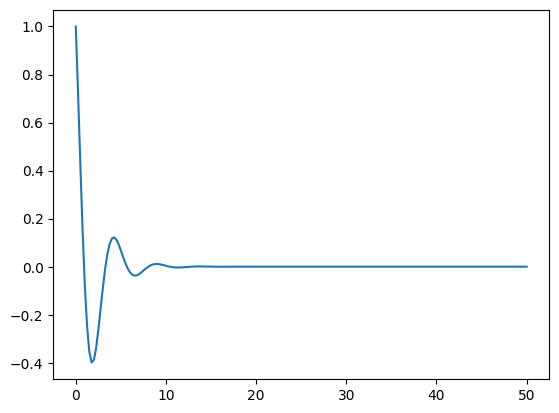

In [4]:
#Condiciones iniciales
a, b = 0, 1
f, g, h = 1, 2, 0
x0 = a
v0 = b
R0 = [x0, v0]       # Vector con las condiciones iniciales

# Se define la ecuación vectorial y se inician las variables en R0
def equations(R0, t):
    x, v = R0
    F = [v, -f*v-g*x-h]
    return F
t = np.linspace(0, 50, 200)

#Solución a la ecuación diferencial
xsol = odeint(equations, R0,  t)
# Se grafican los resultados de x(t)
plt.plot(t, xsol[:,0])
plt.show()
# Se grafican los resultados de v(t)
plt.plot(t, xsol[:,1])
plt.show()

En este codigo solucionamos ecuaciones diferenciales de segundo orden, ejemplo
$$\frac{d^2x}{dt^2}+2\gamma \frac{dx}{dt}+\omega_0^2 x=0$$

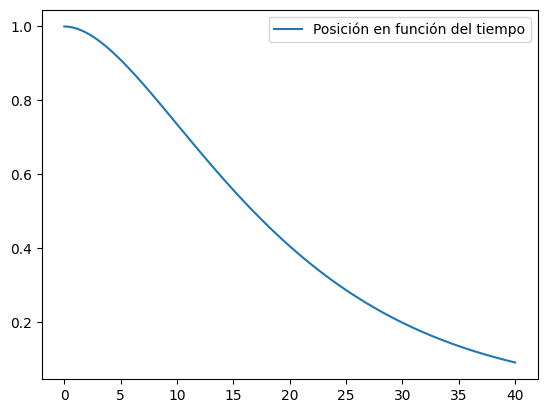

In [12]:
g = 0.1
w0 = 0.1
x0 = [1, 0]
def ecuacion(y0,x):
  x, v = y0
  f = [v, -2*g*v-(w0**2)*x]
  return f

t = np.linspace(0, 40, 100)
xsol = odeint(ecuacion, x0, x)
print()
plt.plot(t, xsol[:, 0], label="Posición en función del tiempo")
plt.legend()
plt.show()


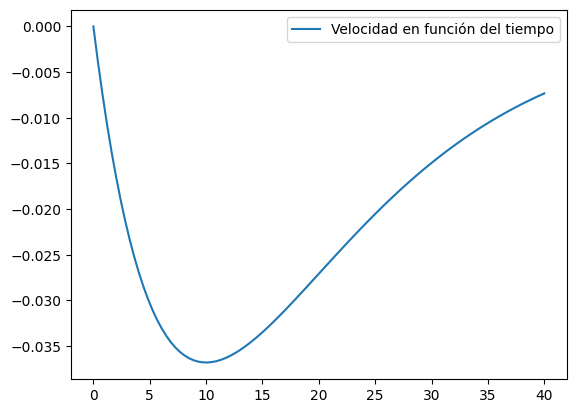

In [13]:
plt.plot(t, xsol[:, 1], label="Velocidad en función del tiempo")
plt.legend()
plt.show()

Ejemplo:
Esfera que cae en el agua

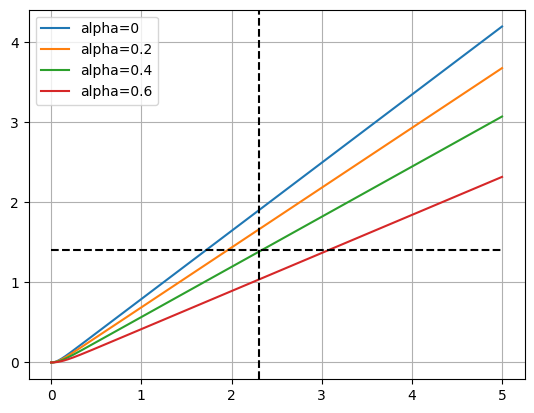

0.02941676724400198


In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Condiciones iniciales
# p densidad de agua
tmax = 1000
pf, c, po, g, r, =1000, 0.47, 7818, 9.77, 0.001915
m = po*(4/3)*np.pi*r**3
A = np.pi*r**2
x0 = [0, 0]  # Posición inicial y velocidad inicial

t = np.linspace(0, 5, tmax)
yy = []


alpha = 0
def ecuacion(x0, t):
    x1, v = x0
    f = [v, (1-pf/po - alpha)*g- (c*pf*A*v**2)/(2*m)]  # Ecuación diferencial
    return f
x1 = odeint(ecuacion, x0, t )

alpha = 0.2
def ecuacion(x0, t):
    x2, v = x0
    f = [v, (1-pf/po - alpha)*g- (c*pf*A*v**2)/(2*m)]  # Ecuación diferencial
    return f
x2 = odeint(ecuacion, x0, t )

alpha = 0.4
def ecuacion(x0, t):
    x3, v = x0
    f = [v, (1-pf/po - alpha)*g- (c*pf*A*v**2)/(2*m)]  # Ecuación diferencial
    return f
x3 = odeint(ecuacion, x0, t )


alpha = 0.6
def ecuacion(x0, t):
    x4, v = x0
    f = [v, (1-pf/po - alpha)*g- (c*pf*A*v**2)/(2*m)]  # Ecuación diferencial
    return f
x4 = odeint(ecuacion, x0, t )


for i in range(tmax):
  yy.append(1.4)

plt.plot(t, x1[:,0], label="alpha=0")
plt.plot(t, x2[:,0], label="alpha=0.2")
plt.plot(t, x3[:,0], label="alpha=0.4")
plt.plot(t, x4[:,0], label="alpha=0.6")
plt.plot(t, yy, color='black', linestyle='dashed')
plt.axvline(2.3, color='black', linestyle='dashed')
plt.grid()
plt.plot()
plt.legend()
plt.show()

print((4/3)*np.pi*(r*100)**3)